In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[[0.00000000e+00 1.04167660e+03 0.00000000e+00 6.77710693e+02
  5.44941628e+01 0.00000000e+00 0.00000000e+00 1.08674231e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.16581267e-02 2.37862147e+00 0.00000000e+00 5.46597017e-03
  1.64831807e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  9.23074241e+02 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.16746740e+03 0.00000000e+00 5.84689913e+01 0.00000000e+00]
 [2.84246055e+03 4.03933688e+03 0.00000000e+00 4.47797049e+02
  6.98315146e-01 0.00000000e+00 3.02089646e+02 0.00000000e+00
  6.42752781e-02 2.10489136e+03 0.00000000e+00 2.42596746e+00
  5.08319194e-01 2.75997423e+02 3.42750233e+02 5.96456883e-02
  2.08590835e+01 0.00000000e+00 0.00000000e+00 0.00000000e+00
  6.53010807e+02 7.32451013e-02 0.00000000e+00 1.75159981e+02
  1.40225763e-01 0.00000000e+00 5.13080480e+00 0.00000000e+00
  2.30789397e+03 0.00000000e+00 2.06395045e-01 0.00000000e+00]
 [1.49

/tmp/ipykernel_12738/1577058657.py:32: RuntimeWarning: invalid value encountered in true_divide
  final_prof = np.nanmedian(mul_prof/weight_prof, axis=1)


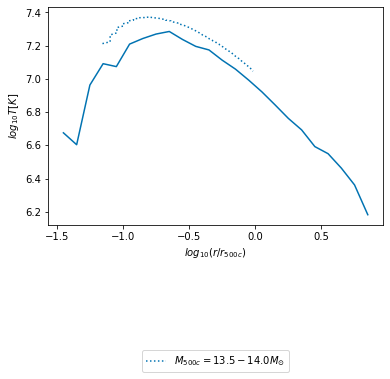

In [118]:
# check joey and me vol-weighted T profile 14.5-15.0
import seaborn as sns
cb = sns.color_palette("colorblind").as_hex()

workpath = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot'
joeypath = f'{workpath}/bin/joey_plot_data'
naspath = f'{workpath}/nastasha_plots_data'

muls = ['part_temperatures'] # part_temperatures, 'nH_dens', 'abun_iron'
inds = ['part_vol'] # 'part_masses', 'part_vols', 'fe17', 'o7f', 'o8'

xbins = np.arange(-1.5, 1, 0.1)
# xbins = np.log10(np.logspace(-2, np.log10(3), 30))
sim = 'L1000N1800'

for i, mf in enumerate([13.5]): # 13.0, 13.5, 14.0, 14.5, 15.0
    # for joey curves
    joey = pd.read_csv(f'{joeypath}/joey_vol_weighted_T_L1-m9-{mf}-{mf+0.5}.csv', header = None)
    plt.plot(np.log10(joey[0]), np.log10(joey[1]), linestyle = 'dotted', c = cb[i], label = f'$M_{{500c}} = {mf}-{mf+0.5}M_{{\odot}}$')

    # for mine curves
    my_weightpath = f'{workpath}/results/redshift_01/{sim}/profiles_230809_{mf}_ind_r500c_from1028draw32'
    my_mulpath = f'{workpath}/results/redshift_01/{sim}/profiles_230809_{mf}_paratest_r500c_from1028draw32'
    for mul in muls:
        for ind in inds:
            mul_prof = np.array(pd.read_csv(f'{my_mulpath}/{mul}_mul_{ind}_010dex_rhp_sph.csv'))[:,1:] 
            weight_prof = np.array(pd.read_csv(f'{my_weightpath}/{ind}_010dex_rhp_sph.csv'))[:-1,1:]
            print(mul_prof)
            # print(np.median(mul_prof))
            # print(np.array(weight_prof))
            # print(mul_prof.shape, weight_prof.shape)
            final_prof = np.nanmedian(mul_prof/weight_prof, axis=1)
            xbins_mid = xbins[:-1] + np.diff(xbins)/2
            plt.plot(xbins_mid, np.log10(final_prof), c = cb[i])
            
            # print(final_prof)
    # # for nas plot
    # nas = pd.read_csv(f'{naspath}/totabun_r_weighted_vol_M{int(mf*10)}-{int((mf+0.5)*10)}.csv', header = None)
    # plt.plot(nas[0], nas[1], linestyle = 'dashed', c = cb[i], label = f'$M_{{500c}} = {mf}-{mf+0.5}M_{{\odot}}$')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7))
plt.ylabel('$log_{10}T [K]$')
# plt.ylabel('$log_{10}nH\ or\ ne [cm^{-3}]$')
# plt.ylabel('$log_{10}nH[cm^{-3}]$')
# plt.ylabel('$log_{10} (Fe/H)$')
# plt.ylabel('$log_{10}Z_{\odot}$')
plt.xlabel('$log_{10}(r/r_{500c})$')
# plt.ylim(6,8.5)
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')

In [ ]:
# check joey and me vol-weighted T profile 14.5-15.0
import seaborn as sns
cb = sns.color_palette("colorblind").as_hex()

workpath = f'/cosma8/data/dp004/dc-chen3/work/bin/halo-radial-profile-in-snapshot'
joeypath = f'{workpath}/bin/joey_plot_data'
naspath = f'{workpath}/nastasha_plots_data'

# muls = ['abun_iron'] # part_temperatures, 'nH_dens'
inds = ['part_vol'] # 'part_masses', 'part_vols', 'fe17', 'o7f', 'o8'

# xbins = np.arange(-1.5, 1, 0.1)
xbins = np.log10(np.logspace(-2, np.log10(3), 30))
sim = 'L1000N1800'

for i, mf in enumerate([13.0, 13.5, 14.0, 14.5, 15.0]): # 13.0, 13.5, 14.0, 14.5, 15.0
    # for joey curves
    joey = pd.read_csv(f'{joeypath}/joey_vol_weighted_Fe-abun_L1-m9-{mf}-{mf+0.5}.csv', header = None)
    plt.plot(np.log10(joey[0]), joey[1], linestyle = 'dotted', c = cb[i], label = f'$M_{{200c}} = {mf}-{mf+0.5}M_{{\odot}}$')

    # for mine curves
    my_weightpath = f'{workpath}/results/redshift_01/{sim}/profiles_230809_{mf}_ind_r500c_FINEBIN'
    my_mulpath = f'{workpath}/results/redshift_01/{sim}/profiles_230809_{mf}_paratest_r500c_FINEBIN'
    # for mul in muls:
    for ind in inds:
        mul_prof1 = pd.read_csv(f'{my_mulpath}/{mul}_mul_{ind}_010dex_jointmsk_sph.csv') 
        weight_prof = pd.read_csv(f'{my_weightpath}/{ind}_010dex_jointmsk_sph.csv')[:-1]
        
        # print(mul_prof.shape, weight_prof.shape)
        final_prof = np.median(mul_prof/weight_prof, axis=1)

        plt.plot(xbins[:-1], np.log10(final_prof), c = cb[i])
        # print(final_prof)
    # # for nas plot
    # nas = pd.read_csv(f'{naspath}/T_r_weighted_vol_M{int(mf*10)}-{int((mf+0.5)*10)}.csv', header = None)
    # plt.plot(nas[0], nas[1], linestyle = 'dashed', c = cb[i], label = f'$M_{{200c}} = {mf}-{mf+0.5}M_{{\odot}}$')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.7))
plt.ylabel('$log_{10}(ne) or (nH) cm^{-3} $')
plt.xlabel('$log_{10}(r/r_{500c})$')
fig = plt.gcf()  # Get the current figure
fig.set_facecolor('white')

In [ ]:
# check the r200c of 32 halo in old and new samples
from glob import glob
oldpath = f'{workpath}/results/redshift_01/L1000N1800/xraysb_csvs_230718_13.5_groups_1028halos_cyl' 
newpath = f'{workpath}/results/redshift_01/L1000N1800/xraysb_csvs_230809_13.5_groups_32halos_sph' 

old_sumfile = pd.read_csv(glob(f'{oldpath}/*btw*')[0])
new_sumfile = pd.read_csv(glob(f'{newpath}/*btw*')[0])

In [ ]:
## check if there is scale factor in r200c
import h5py
for snapnum in [77, 76, 75, 74, 73, 72, 71, 70]:
    with h5py.File(f"/cosma8/data/dp004/flamingo/Runs/{sim}/HYDRO_FIDUCIAL/SOAP/halo_properties_00{snapnum}.hdf5", 'r') as catalogue_soap:
        r200c_sp = catalogue_soap["SO/500_crit/SORadius"][()]  
        print(np.median(r200c_sp))

In [ ]:
# check the gas mass fraction of r500c and r200c in soap
import h5py

with h5py.File(f"/cosma8/data/dp004/flamingo/Runs/{sim}/HYDRO_FIDUCIAL/SOAP/halo_properties_00{snapnum}.hdf5", 'r') as catalogue_soap:  
    m200c_tot = catalogue_soap["SO/200_crit/TotalMass"][()]  
    m200c_gas = catalogue_soap["SO/200_crit/GasMass"][()]  
    m500c_tot = catalogue_soap["SO/500_crit/TotalMass"][()]  
    m500c_gas = catalogue_soap["SO/500_crit/GasMass"][()]
    for M in [13.0, 13.5, 14.0, 14.5, 15.0]:  
        mask = (m200c_tot< np.power(10, M+0.5)) & (m200c_tot> np.power(10, M))
        # print(np.nanmedian((m200c_gas/m200c_tot)[mask]), np.nanmean((m200c_gas/m200c_tot)[mask]))
        # print(np.nanmedian((m500c_gas/m500c_tot)[mask]), np.nanmean((m500c_gas/m500c_tot)[mask]))
        print(np.nanmedian((m500c_gas)[mask]), np.nanmean((m500c_gas)[mask]))

In [ ]:
# check the gas mass fraction in current data
inds = ['part_masses']
xbins = np.log10(np.logspace(-2, np.log10(3), 30))[:-1]

for i, mf in enumerate([13.5]): # 13.0, 13.5, 14.0, 14.5, 15.0
    # for mine curves
    my_weightpath = f'{workpath}/results/redshift_01/{sim}/profiles_230809_{mf}_ind_r500c_FINEBIN'
    for ind in inds:
        weight_prof = pd.read_csv(f'{my_weightpath}/{ind}_010dex_jointmsk_sph.csv')[:-1]
        print(np.median(np.sum(weight_prof[xbins<=0]*1e10, axis=1)))

In [ ]:
weight_prof